In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random

In [4]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

n = 500

data = {
    'Date': pd.date_range(start='2020-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 1000, size=n)
}

In [39]:
df = pd.DataFrame(data)

head = df.head()
head.style.hide(axis="index")

Date,Category,Likes
2020-01-01 00:00:00,Fitness,239
2020-01-02 00:00:00,Fitness,103
2020-01-03 00:00:00,Culture,132
2020-01-04 00:00:00,Travel,799
2020-01-05 00:00:00,Health,56


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None


In [31]:
df.describe()

,Date,Likes
count,500,500.000000
mean,2020-09-06 12:00:00,490.260000
min,2020-01-01 00:00:00,0.000000
25%,2020-05-04 18:00:00,243.250000
50%,2020-09-06 12:00:00,494.500000
75%,2021-01-09 06:00:00,722.500000
max,2021-05-14 00:00:00,999.000000
std,NaN,281.173337


In [37]:
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts.style.hide(axis="index")

Category,Count
Culture,72
Fitness,70
Fashion,70
Health,61
Family,61
Travel,59
Music,54
Food,53


In [7]:
# Remove null content
df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Convert date column into date time
df['Date'] = pd.to_datetime(df['Date'])

# Force likes to be integers
df['Likes'] = df['Likes'].astype(int)

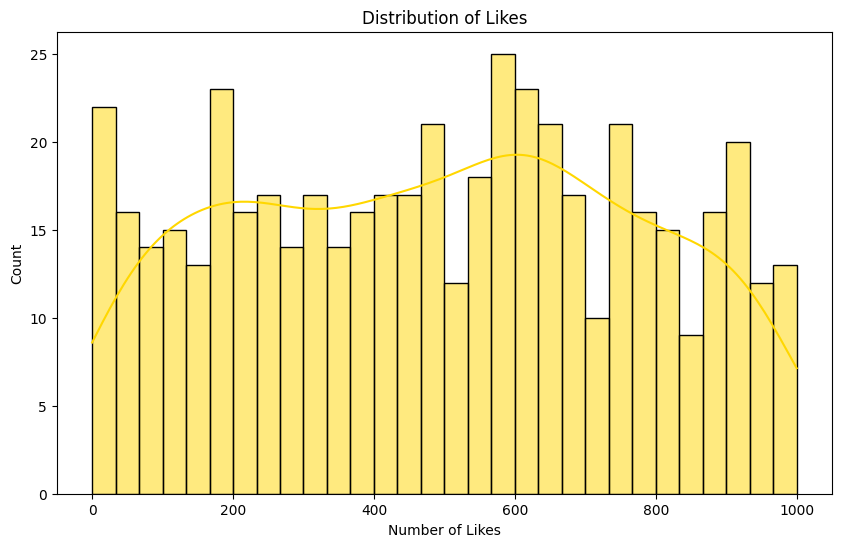

In [8]:
# Likes visualized using a Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Likes'], bins=30, kde=True, color='gold')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Count')
plt.show()

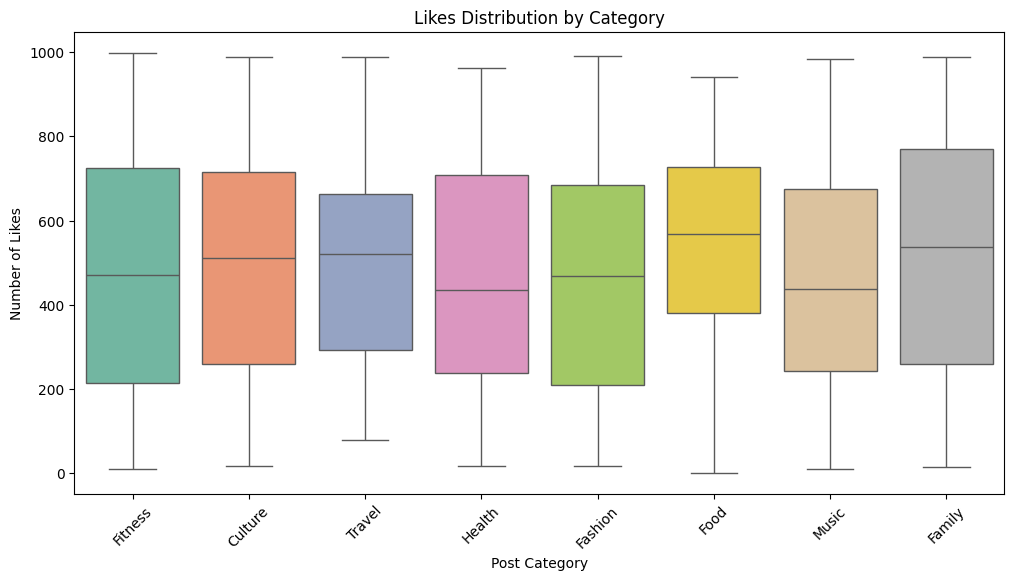

In [50]:
# Boxplot of Likes by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Likes', data=df, palette='Set2', hue='Category', dodge=False, legend=False)
plt.title('Likes Distribution by Category')
plt.xlabel('Post Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

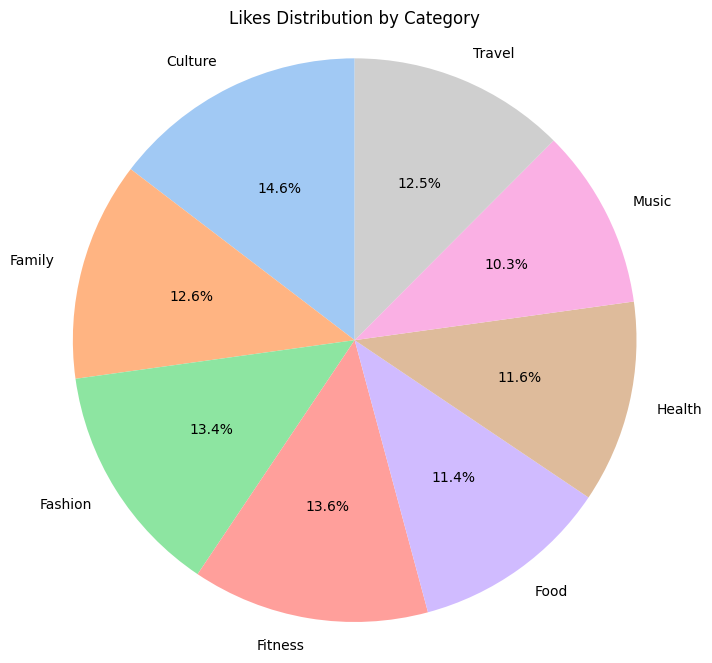

In [18]:
# A boxplot of Likes by Category
likes_per_category = df.groupby('Category')['Likes'].sum()
plt.figure(figsize=(8,8))
plt.pie(likes_per_category,labels=likes_per_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Likes Distribution by Category')
plt.axis('equal')
plt.show()

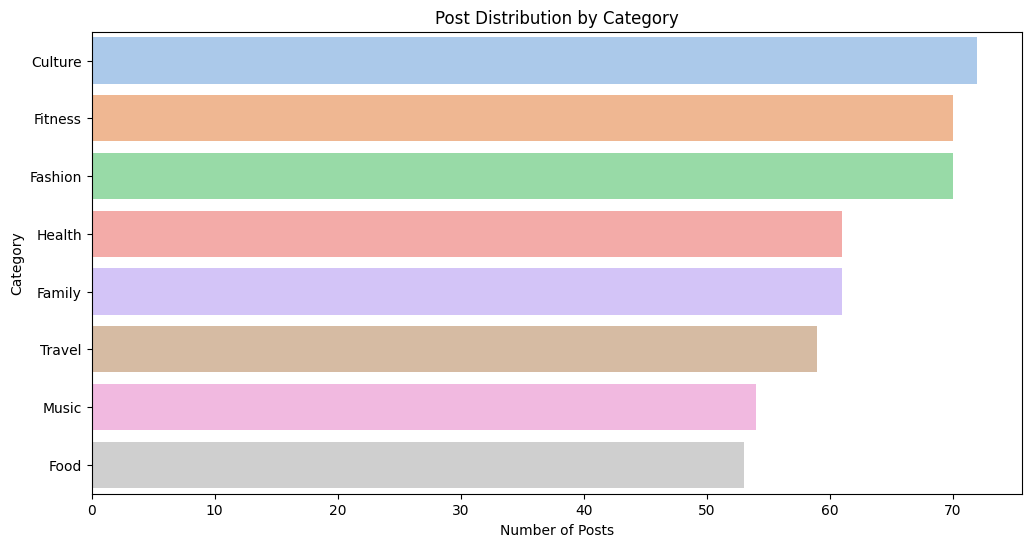

In [48]:
# A horizontal barchart showing Number of Posts per Category

category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

plt.figure(figsize=(12, 6))

sns.barplot(
    y='Category', 
    x='Count', 
    data=category_counts, 
    palette='pastel', 
    hue='Category', 
    dodge=False, 
    legend=False
)
plt.xlabel('Number of Posts')
plt.ylabel('Category')
plt.title('Post Distribution by Category')
plt.legend([],[], frameon=False)
plt.show()

In [22]:
# Overall Mean of Likes
print(f'Overall Average Likes: {df["Likes"].mean():.2f}')
print()
# Mean Likes per Category
mean_per_categories = df.groupby('Category')['Likes'].mean()
print("Average Likes per Category: ")
print(mean_per_categories)

Overall Average Likes: 490.26

Average Likes per Category: 
Category
Culture    497.791667
Family     505.049180
Fashion    469.328571
Fitness    476.142857
Food       526.660377
Health     466.770492
Music      469.129630
Travel     518.288136
Name: Likes, dtype: float64
